# Simple Chains

## Now we will create Pipelines when first input will be second component output

In [7]:
# for gemini llm integration through api
!pip install -U langchain-google-genai

# for giving ui for PIL
!pip install grandalf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 23.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 443.5/443.5 kB 18.2 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.66
    Uninstalling langchain-core-0.3.66:
      Successfully uninstalled langchain-core-0.3.66
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstalling google-ai-generativelanguage-0.6.15:
      Successfully uninstalled google-ai-generativelanguage-0.6.15
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.6.18 which is incompatible.
   ━━━━━━

In [8]:
import getpass
import os

if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter your Google AI API key: ")

Enter your Google AI API key:  ········


In [14]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

#Step1
model = ChatGoogleGenerativeAI(model = "gemini-1.5-flash")

#Step2
prompt = PromptTemplate(
    template = 'Generate 5 interesting facts about{topic}',
    input_variables = ['topic']
)

#Step3
parser = StrOutputParser()

#Now we are creating chain by applying | this language is called langchain Expression language
chain = prompt | model | parser

Here first prompt will run then it's input will be directed to model i.e it's output will be models input

Earlier we have to Run all these three differently and lastly we have to return content from results but here we can do it with the help of chain

In [15]:
result = chain.invoke({'topic':'cricket'})

print(result)

1. **The "googly":**  A googly is a type of delivery bowled by a right-arm leg-spinner that spins in the opposite direction to a conventional leg break.  It's a deceptive and highly skilled ball, famously mastered by players like  Shane Warne, making it a fascinating aspect of the game's technical complexity.

2. **Cricket's global reach:** While originating in England, cricket is now a major sport in many countries, including India, Australia, Pakistan, South Africa, the West Indies, and Bangladesh, demonstrating its remarkable adaptability and international appeal.  The sheer diversity of playing styles across these nations is compelling.

3. **The longest Test match:** The longest Test match in history lasted 14 days (10 days of actual play) between England and South Africa in 1939. This highlights the endurance and strategic depth required in the longer formats of the game.

4. **The "Bodyline" series:** The 1932-33 Ashes series between Australia and England saw the controversial "

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [16]:
chain.get_graph().print_ascii()

      +-------------+      
      | PromptInput |      
      +-------------+      
             *             
             *             
             *             
    +----------------+     
    | PromptTemplate |     
    +----------------+     
             *             
             *             
             *             
+------------------------+ 
| ChatGoogleGenerativeAI | 
+------------------------+ 
             *             
             *             
             *             
    +-----------------+    
    | StrOutputParser |    
    +-----------------+    
             *             
             *             
             *             
+-----------------------+  
| StrOutputParserOutput |  
+-----------------------+  


# Sequential Chain

Now in sequential chain we will call the llm twice

First we will take Topic from user then asking llm to give detailed report then again we will send this report to llm and ask it to summarize it in 5 points.

In [18]:
#Step1
llm = ChatGoogleGenerativeAI(model = "gemini-1.5-flash")

prompt1 = PromptTemplate(
    template = 'Generate a detailed report on {topic}',
    input_variables = ['topic']
)

prompt2 = PromptTemplate(
    template = 'Generate a 5 pointer summary from the following text\n{text}',
    input_variables = ['text']
    
)

parser = StrOutputParser()

chain = prompt1 | llm | parser | prompt2 | llm | parser

result = chain.invoke({'topic':'Unemployment in India'})

print(result)

Here's a 5-point summary of the provided text on unemployment in India:

1. **High and Varied Unemployment:** India faces significant unemployment, exceeding official figures due to underemployment and the large informal sector.  Unemployment rates vary drastically across demographics (youth, women, rural vs. urban, education levels).

2. **Underlying Causes:**  Multiple factors contribute, including slow economic growth, a skills mismatch, technological displacement, rapid population growth, inadequate infrastructure, and ineffective labor policies.

3. **Severe Impacts:**  High unemployment causes widespread poverty and inequality, fuels social unrest, hinders economic growth, and leads to brain drain.

4. **Proposed Solutions:**  A multifaceted approach is necessary, encompassing boosting economic growth, investing heavily in skill development and education, promoting entrepreneurship, improving infrastructure, strengthening social safety nets, reforming labor laws, and implementing

# Parallel Chains

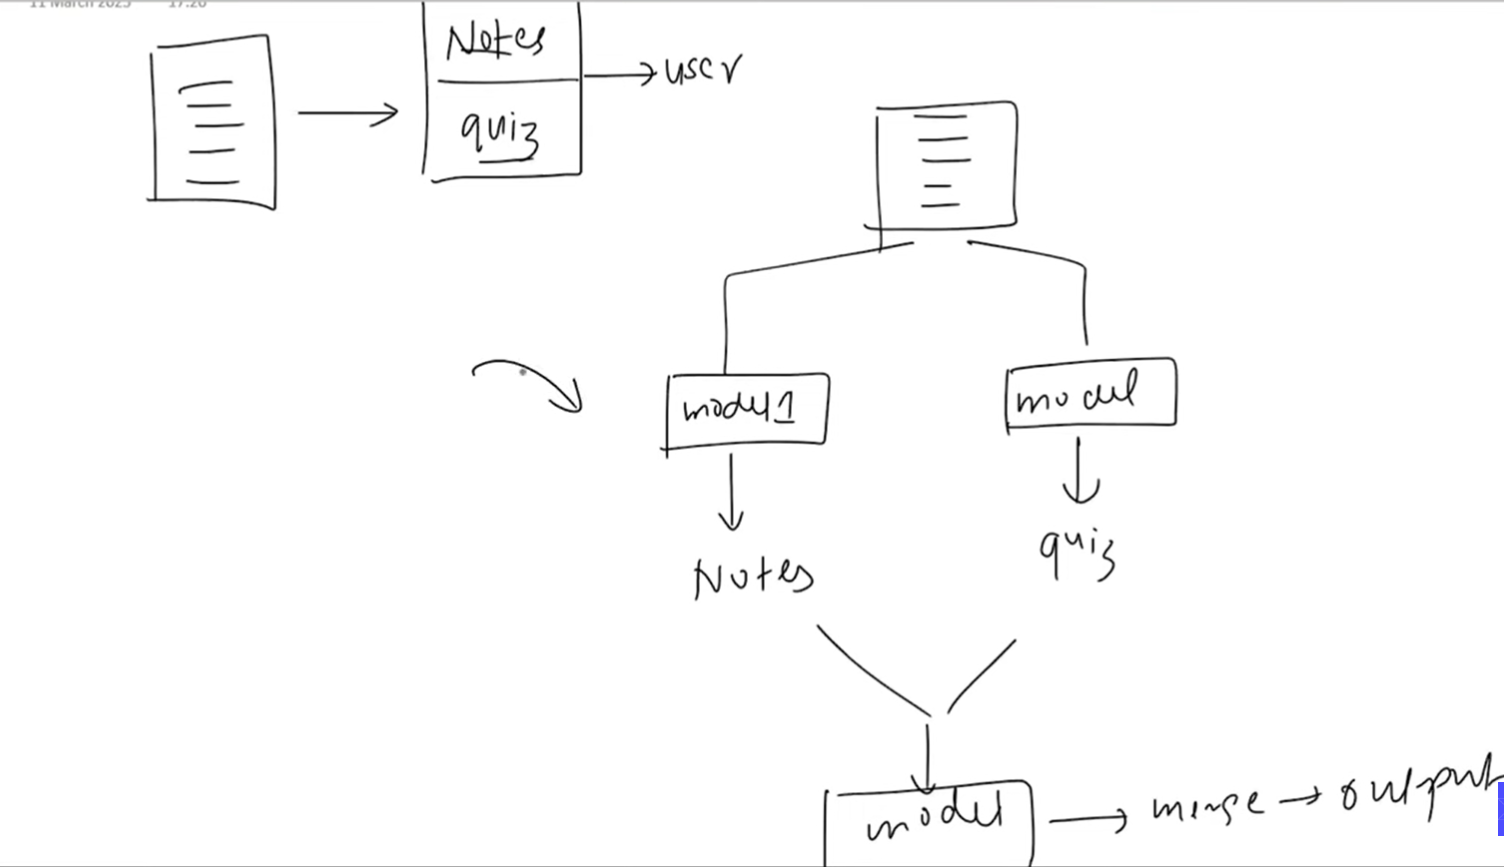

Here we will give input text and it will convert it into Notes as well as quiz at the same time then send it into another model and gives the output with the help of **RunnableParallel**

In [11]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain.schema.runnable import RunnableParallel

#Step1
model = ChatGoogleGenerativeAI(model = "gemini-1.5-flash")

prompt1 = PromptTemplate(
    template = 'Generate short and simple notes from the following text\n{text}',
    input_variables = ['text']
)

prompt2 = PromptTemplate(
    template = 'Generate 5 question answer from the following text \n{text}',
    input_variables = ['text']
)

prompt3 = PromptTemplate(
    template = 'merge the provided text and notes into a single document \n notes {notes} and quiz {quiz}',
    input_variables = ['notes','quiz']
)

parser = StrOutputParser()

parallel_chain = RunnableParallel(
    {
        'notes' : prompt1 | model | parser,
        'quiz' : prompt2 | model | parser
    }
)

merge_chain = prompt3 | model | parser

chain = parallel_chain | merge_chain

text = """  1. Feature Creation: Feature creation involves generating new features from domain knowledge or by observing patterns in the data. It can be:

Domain-specific: Created based on industry knowledge likr business rules.
Data-driven: Derived by recognizing patterns in data.
Synthetic: Formed by combining existing features.
2. Feature Transformation: Transformation adjusts features to improve model learning:

Normalization & Scaling: Adjust the range of features for consistency.
Encoding: Converts categorical data to numerical form i.e one-hot encoding.
Mathematical transformations: Like logarithmic transformations for skewed data.
3. Feature Extraction: Extracting meaningful features can reduce dimensionality and improve model accuracy:

Dimensionality reduction: Techniques like PCA reduce features while preserving important information.
Aggregation & Combination: Summing or averaging features to simplify the model.
4. Feature Selection: Feature selection involves choosing a subset of relevant features to use:

Filter methods: Based on statistical measures like correlation.
Wrapper methods: Select based on model performance.
Embedded methods: Feature selection integrated within model training.
5. Feature Scaling: Scaling ensures that all features contribute equally to the model:

Min-Max scaling: Rescales values to a fixed range like 0 to 1.
Standard scaling: Normalizes to have a mean of 0 and variance of 1.
Steps in Feature Engineering
Feature engineering can vary depending on the specific problem but the general steps are:

Data Cleansing: Identify and correct errors or inconsistencies in the dataset to ensure data quality and reliability.
Data Transformation: Transform raw data into a format suitable for modeling including scaling, normalization and encoding.
Feature Extraction: Create new features by combining or deriving information from existing ones to provide more meaningful input to the model.
Feature Selection: Choose the most relevant features for the model using techniques like correlation analysis, mutual information and stepwise regression.
Feature Iteration: Continuously refine features based on model performance by adding, removing or modifying features for improvement.

"""

In [12]:
chain.invoke({'text': text})

'# Feature Engineering: A Comprehensive Guide\n\nFeature engineering is a crucial step in machine learning, significantly impacting model performance.  It involves creating, transforming, extracting, and selecting features to improve model accuracy and efficiency.  This document outlines the key aspects of feature engineering, including its various techniques and general steps.\n\n## Feature Engineering Techniques\n\nFeature engineering encompasses several key techniques, broadly categorized as follows:\n\n**1. Feature Creation:** This involves generating new features from existing data or domain knowledge.  Methods include:\n\n* **Domain-specific (business rules):** Leveraging expert knowledge and business rules to create relevant features.  For example, creating a "customer age group" feature from a "customer age" feature.\n* **Data-driven (patterns):** Identifying patterns and relationships within the data to create new features. This might involve using statistical methods or clust

In [13]:
chain.get_graph().print_ascii()

                    +---------------------------+                      
                    | Parallel<notes,quiz>Input |                      
                    +---------------------------+                      
                       ***                   ***                       
                   ****                         ****                   
                 **                                 **                 
    +----------------+                          +----------------+     
    | PromptTemplate |                          | PromptTemplate |     
    +----------------+                          +----------------+     
             *                                           *             
             *                                           *             
             *                                           *             
+------------------------+                  +------------------------+ 
| ChatGoogleGenerativeAI |                  | ChatGoogleGenerati